# Data Cleaning and Investigation

## Imports

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Import Palettes

In [2]:
import sys

sys.path.append(r'C:\Users\svtee\DAI')

from helper.my_funcs import (classic_color, 
                             yacht_club_color, 
                             bold_basics_color,
                             basic_brights_color,
                             beeswax_clay_color,
                             main_color
                             )

### Load / Read and Validate Data

In [3]:
yt_df = pd.read_csv('../.gitignore/data/USvideos.csv')

# View data
yt_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [4]:
# Review null / dtype details
yt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

### DataTime Transformation

In [5]:
# `trending_date`
yt_df['publish_time'] = pd.to_datetime(yt_df['publish_time'], errors='coerce')

yt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   video_id                40949 non-null  object             
 1   trending_date           40949 non-null  object             
 2   title                   40949 non-null  object             
 3   channel_title           40949 non-null  object             
 4   category_id             40949 non-null  int64              
 5   publish_time            40949 non-null  datetime64[ns, UTC]
 6   tags                    40949 non-null  object             
 7   views                   40949 non-null  int64              
 8   likes                   40949 non-null  int64              
 9   dislikes                40949 non-null  int64              
 10  comment_count           40949 non-null  int64              
 11  thumbnail_link          40949 non-null  o

In [6]:
yt_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04+00:00,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [7]:
category_map = {
    1:  "Film & Animation",
    2:  "Autos & Vehicles",
    10: "Music",
    15: "Pets & Animals",
    17: "Sports",
    19: "Travel & Events",
    20: "Gaming",
    22: "People & Blogs",
    23: "Comedy",
    24: "Entertainment",
    25: "News & Politics",
    26: "How to & Style",
    27: "Education",
    28: "Science & Technology",
    29: "Nonprofits & Activism",
    43: "Shows"
}
yt_df["video_category"] = yt_df["category_id"].map(category_map)
yt_df.sample(15)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,video_category
32236,4ZO-jde2smo,18.02.05,Grace VanderWaal Watches Fan Covers On YouTube...,Glamour Magazine,24,2018-04-26 20:45:14+00:00,"grace vanderwaal|""grace vanderwaal cover""|""you...",654874,23453,283,1409,https://i.ytimg.com/vi/4ZO-jde2smo/default.jpg,False,False,False,"On this episode of You Sang My Song, Grace Van...",Entertainment
33927,oY9GVZKwBhI,18.10.05,COPYING MADDIE ZIEGLER'S INSTAGRAM PHOTOS,Jess Conte,24,2018-04-26 00:55:12+00:00,"bauerbirds|""jess conte""|""jess bauer""|""jess and...",2163764,108857,1476,2787,https://i.ytimg.com/vi/oY9GVZKwBhI/default.jpg,False,False,False,finally got to film with the sweetest girl on ...,Entertainment
16471,XxvQIaCJ9Xw,18.06.02,Wix.com Official 2018 Big Game Ad with Rhett &...,Wix.com,1,2018-02-02 20:15:04+00:00,"wix|""wix.com""|""website builder""|""web design""|""...",276975,1162,25,135,https://i.ytimg.com/vi/XxvQIaCJ9Xw/default.jpg,False,False,False,Rhett & Link are so proud of their stunning Wi...,Film & Animation
38659,37R2_bvJjGM,18.03.06,I MISS YOU GUYS | Update.,KathleenLights,26,2018-05-23 11:00:00+00:00,klpolish,524333,27709,1029,6555,https://i.ytimg.com/vi/37R2_bvJjGM/default.jpg,False,False,False,"Hey, Guys!Here is a video where I talk about w...",How to & Style
36352,wI89nVn6LHk,18.23.05,Maddie Poppe Wins American Idol 2018 - Finale ...,American Idol,24,2018-05-22 04:08:24+00:00,"ABC|""americanidol""|""idol""|""american idol""|""rya...",1140768,13919,1925,2424,https://i.ytimg.com/vi/wI89nVn6LHk/default.jpg,False,False,False,Maddie Poppe the crowd the American Idol 2018 ...,Entertainment
28069,bEWLOo12UAU,18.05.04,Picking the 2018 XXL Freshman 10th Spot,fantano,10,2018-03-27 20:00:10+00:00,"hip hop|""xxl""|""freshman""|""2018""|""cover""|""ski m...",261657,6281,417,3111,https://i.ytimg.com/vi/bEWLOo12UAU/default.jpg,False,False,False,http://freshmanxxlmag.com/10th-spot/\n\nMy soc...,Music
2160,NNywashg_mw,17.24.11,Is Chip Kelly interested in Gators job? | Spor...,ESPN,17,2017-11-19 14:10:10+00:00,"espn|""espn live""|""chip kelly""|""florida gators""...",38945,207,41,110,https://i.ytimg.com/vi/NNywashg_mw/default.jpg,False,False,False,Chip Kelly responds on SportsCenter to specula...,Sports
17916,BhIEIO0vaBE,18.13.02,To Our Daughter,Kylie Jenner,22,2018-02-04 20:27:38+00:00,"Kylie Jenner|""Kylie""|""Travis Scott""|""Baby""|""An...",55063465,0,0,0,https://i.ytimg.com/vi/BhIEIO0vaBE/default.jpg,True,True,False,Directed by Tyler Ross @wttyler\nMusic by Jaco...,People & Blogs
18280,LR2edIotyE8,18.15.02,Did Beyonce Have To Check An Actress Talking T...,TV One,24,2018-02-09 23:29:30+00:00,"TV One|""Radio One""|""Interactive One""|""Beyonce""...",157494,0,0,161,https://i.ytimg.com/vi/LR2edIotyE8/default.jpg,False,True,False,Only Tiffany Haddish can say she had THIS kind...,Entertainment
10105,1A_feeLPImg,18.03.01,Three peg - 978938-3,RM Videos,23,2017-12-29 02:02:43+00:00,"Viral|""Video""|""Epic""",22795,39,4,6,https://i.ytimg.com/vi/1A_feeLPImg/default.jpg,False,False,False,Jukin Media Verified (Original) * For licensin...,Comedy


C:\Users\svtee\AppData\Local\Temp\ipykernel_37072\2003266703.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


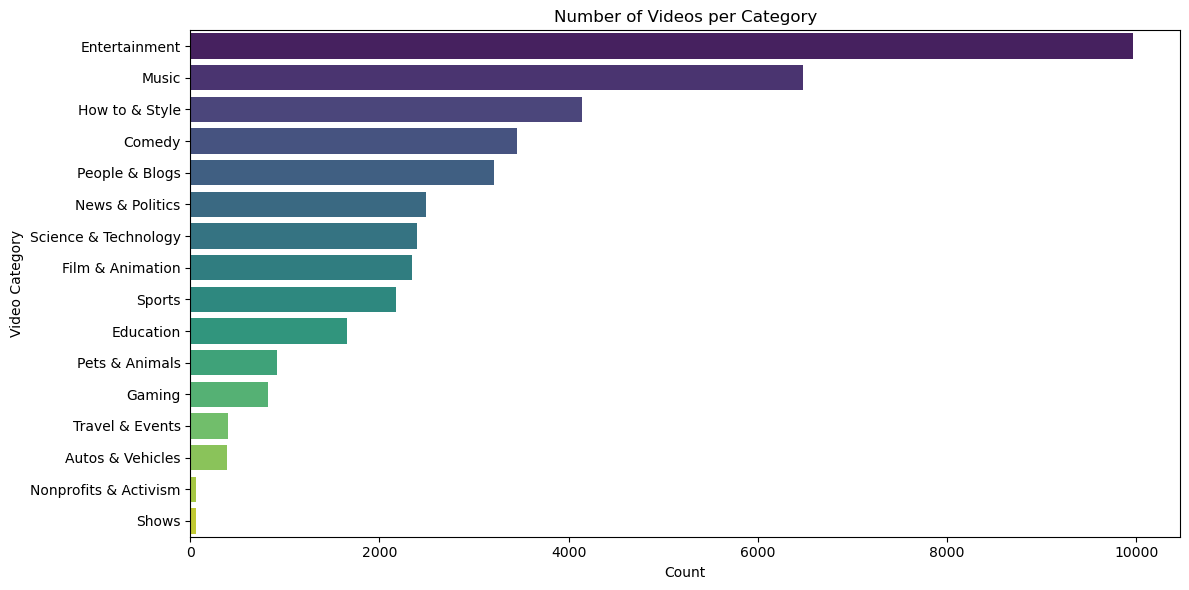

In [8]:
plt.figure(figsize=(12,6))
counts = yt_df['video_category'].value_counts()
sns.barplot(
    y=counts.index,
    x=counts.values,
    palette=sns.color_palette("viridis", len(counts)),
    orient='h',
)
plt.title('Number of Videos per Category')
plt.xlabel('Count')
plt.ylabel('Video Category')
plt.tight_layout()
plt.show()